In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chennai-water-management/chennai_reservoir_levels.csv
/kaggle/input/chennai-water-management/chennai_reservoir_rainfall.csv


In [3]:
rain = pd.read_csv('/kaggle/input/chennai-water-management/chennai_reservoir_rainfall.csv')
level = pd.read_csv('/kaggle/input/chennai-water-management/chennai_reservoir_levels.csv')

In [4]:
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(rain.head())
print('=============================================================')
print(level.head())

         Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0  01-01-2004     0.0         0.0       0.0              0.0
1  02-01-2004     0.0         0.0       0.0              0.0
2  03-01-2004     0.0         0.0       0.0              0.0
3  04-01-2004     0.0         0.0       0.0              0.0
4  05-01-2004     0.0         0.0       0.0              0.0
         Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0  01-01-2004     3.9         0.0     268.0              0.0
1  02-01-2004     3.9         0.0     268.0              0.0
2  03-01-2004     3.9         0.0     267.0              0.0
3  04-01-2004     3.9         0.0     267.0              0.0
4  05-01-2004     3.8         0.0     267.0              0.0


In [6]:
level['TOTAL'] =level['POONDI']+level['CHOLAVARAM']+level['REDHILLS']+level['CHEMBARAMBAKKAM']
#Total rain per day 
rain['TOTAL'] = rain['POONDI']+rain['CHOLAVARAM']+rain['REDHILLS']+rain['CHEMBARAMBAKKAM']

In [7]:
level['USAGE']=level['TOTAL'].diff(periods=-1)
rain['RAIN_TREND'] = rain['TOTAL'].diff(periods=-1)

from datetime import datetime
#Convert Date from str to Datetime
level['Date'] = pd.to_datetime(level['Date'],dayfirst=True)
rain['Date'] = pd.to_datetime(rain['Date'],dayfirst=True)

In [8]:
level.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,TOTAL,USAGE
0,2004-01-01,3.9,0.0,268.0,0.0,271.9,0.0
1,2004-01-02,3.9,0.0,268.0,0.0,271.9,1.0
2,2004-01-03,3.9,0.0,267.0,0.0,270.9,0.0
3,2004-01-04,3.9,0.0,267.0,0.0,270.9,0.1
4,2004-01-05,3.8,0.0,267.0,0.0,270.8,1.0


In [9]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,TOTAL,RAIN_TREND
0,2004-01-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
rain.describe()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,TOTAL,RAIN_TREND
count,6182,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6181.000000
mean,2012-06-17 12:00:00,3.460927,3.728114,3.833323,3.973318,14.995681,-0.018929
min,2004-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-1122.800000
25%,2008-03-25 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012-06-17 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-09-09 18:00:00,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,2020-12-03 00:00:00,300.000000,293.000000,320.000000,475.000000,1277.400000,1185.800000
std,NaN,12.991716,14.194379,14.982880,16.085149,52.636625,60.222244


In [11]:
level.describe()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,TOTAL,USAGE
count,6182,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6181.000000
mean,2012-06-17 12:00:00,1106.739588,226.404589,1592.321652,1321.460555,4246.926383,-1.488448
min,2004-01-01 00:00:00,0.900000,0.000000,0.000000,0.000000,0.900000,-7729.400000
25%,2008-03-25 06:00:00,202.000000,26.000000,847.250000,459.250000,1743.000000,-7.000000
50%,2012-06-17 12:00:00,783.150000,89.000000,1685.000000,1264.000000,3967.500000,11.300000
75%,2016-09-09 18:00:00,1918.000000,411.000000,2320.000000,2046.750000,6288.000000,26.000000
max,2020-12-03 00:00:00,3231.000000,896.000000,3300.000000,3396.000000,10568.000000,7701.400000
std,NaN,1004.555050,266.886855,915.243744,951.791133,2918.646766,223.327317


In [12]:

from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot,row,column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

output_notebook() 
source = ColumnDataSource(level)
TOOLS = "pan,wheel_zoom,box_zoom,box_select,lasso_select,reset,help"


plot1 = figure(tools=TOOLS,width=400,height=400,x_axis_type="datetime",title='POONDI LEVELS')
plot2 = figure(tools=TOOLS,width=plot1.width,height=plot1.height,x_range=plot1.x_range,y_range=plot1.y_range,x_axis_type="datetime",title='CHOLAVARAM LEVELS')
plot3 = figure(tools=TOOLS,width=plot1.width,height=plot1.height,x_range=plot1.x_range,y_range=plot1.y_range,x_axis_type="datetime",title='REDHILLS LEVELS')
plot4 = figure(tools=TOOLS,width=plot1.width,height=plot1.height,x_range=plot1.x_range,y_range=plot1.y_range,x_axis_type="datetime",title='CHEMBARAMBAKKAM LEVELS')
plot5 =figure(tools=TOOLS,width=plot1.width,height=plot1.height,x_range=plot1.x_range,x_axis_type="datetime",title='USAGE LEVELS')
plot6= figure(tools=TOOLS,width=plot1.width,height=plot1.height,x_range=plot1.x_range,x_axis_type="datetime",title='TOTAL LEVELS')

plot1.line(x='Date', y='POONDI',color='blue',source=source)
plot2.line(x='Date', y='CHOLAVARAM',color='red',source=source)
plot3.line(x='Date', y='REDHILLS',color='black',source=source)
plot4.line(x='Date', y='CHEMBARAMBAKKAM',color='green',source=source)
plot5.line(x='Date', y='USAGE',color='green',source=source)
plot6.line(x='Date', y='TOTAL',color='grey',source=source)

plot_levels =  row(column(plot1,plot2),column(plot3,plot4),column(plot5,plot6))

show(plot_levels)

Loading BokehJS ...

In [13]:
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot,row,column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

source2 = ColumnDataSource(rain)

plot7= figure(tools=TOOLS,width=plot1.width,height=plot1.height,x_range=plot1.x_range,x_axis_type="datetime",title='RAIN LEVELS')
plot8= figure(tools=TOOLS,width=plot1.width,height=plot1.height,x_range=plot1.x_range,x_axis_type="datetime",title='RAIN TRENDS')

plot7.line(x='Date', y='TOTAL',color='blue',source=source2)
plot8.line(x='Date', y='RAIN_TREND',color='red',source=source2)

plot_rain = column(row(plot5,plot6),row(plot8,plot7))
show(plot_rain)

In [14]:
df = pd.merge(rain, level, on='Date', how='inner')

**Comparison of the level in the different reservoirs**

In [15]:
fig = px.line(rain, x = "Date", y= ['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM'], title = "rain fall captured in the water reservoirs")
fig.show()

**Comparison of the rain at different reservoir**

In [16]:
fig = px.line(level, x = "Date", y= ['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM'], title = "water levels in the different water reservoir")
fig.show()

**Seeing the correlation between the rain and the level**

In [17]:
correlation_coefficient, p_value = pearsonr(df['POONDI_x'], df['POONDI_y'])
print(f'Pearson Correlation Coefficient:{correlation_coefficient}')
print(f'P-value:{p_value}')

Pearson Correlation Coefficient:0.002202377992757365
P-value:0.8625502705039564


In [18]:
correlation_coefficient, p_value = pearsonr(df['CHOLAVARAM_x'], df['CHOLAVARAM_y'])
print(f'Pearson Correlation Coefficient:{correlation_coefficient}')
print(f'P-value:{p_value}')

Pearson Correlation Coefficient:0.02333243108158344
P-value:0.06659354888558146


In [19]:
correlation_coefficient, p_value = pearsonr(df['REDHILLS_x'], df['REDHILLS_y'])
print(f'Pearson Correlation Coefficient:{correlation_coefficient}')
print(f'P-value:{p_value}')

Pearson Correlation Coefficient:-0.027324753877082938
P-value:0.03168243410277644


In [20]:
correlation_coefficient, p_value = pearsonr(df['CHEMBARAMBAKKAM_x'], df['CHEMBARAMBAKKAM_y'])
print(f'Pearson Correlation Coefficient:{correlation_coefficient}')
print(f'P-value:{p_value}')

Pearson Correlation Coefficient:0.024608041218430056
P-value:0.05302392182181638


In [21]:
level.Date = pd.to_datetime(level.Date, format='mixed')
level.set_index('Date', inplace=True)

In [22]:
rain.Date= pd.to_datetime(rain.Date, format='mixed')
rain.set_index('Date', inplace=True)

**Checking the correlation between reserviors**

In [23]:
corr = rain.corr()
corr.style.background_gradient(cmap='PuBu')

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,TOTAL,RAIN_TREND
POONDI,1.000000,0.717860,0.706190,0.676785,0.848236,0.506014
CHOLAVARAM,0.717860,1.000000,0.900510,0.740898,0.929586,0.534075
REDHILLS,0.706190,0.900510,1.000000,0.774342,0.938417,0.529549
CHEMBARAMBAKKAM,0.676785,0.740898,0.774342,1.000000,0.892842,0.498266
TOTAL,0.848236,0.929586,0.938417,0.892842,1.000000,0.571924
RAIN_TREND,0.506014,0.534075,0.529549,0.498266,0.571924,1.000000


In [24]:
corr = level.corr()
corr.style.background_gradient(cmap='PuBu')

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,TOTAL,USAGE
POONDI,1.000000,0.823638,0.754660,0.852809,0.934258,0.023029
CHOLAVARAM,0.823638,1.000000,0.690272,0.776602,0.844640,0.024742
REDHILLS,0.754660,0.690272,1.000000,0.862498,0.917715,0.042216
CHEMBARAMBAKKAM,0.852809,0.776602,0.862498,1.000000,0.961112,0.041119
TOTAL,0.934258,0.844640,0.917715,0.961112,1.000000,0.036838
USAGE,0.023029,0.024742,0.042216,0.041119,0.036838,1.000000


**ARIMA Model**

In [25]:
import numpy as np
plt.style.use('fivethirtyeight')
import itertools
import statsmodels.api as sm
import matplotlib

In [27]:
cols = ['CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']
poondi_rain = rain.drop(cols, axis=1, inplace=True)
poondi_level= level.drop(cols,axis=1,inplace=True)

poondi_rain = rain.sort_values('Date')
poondi_level= level.sort_values('Date')

#rain = rain.set_index('Date')
poondi_level = level.sort_values('Date')

In [29]:
poondi_rain.head()

,POONDI,TOTAL,RAIN_TREND
Date,,,
2004-01-01,0.0,0.0,0.0
2004-01-02,0.0,0.0,0.0
2004-01-03,0.0,0.0,0.0
2004-01-04,0.0,0.0,0.0
2004-01-05,0.0,0.0,0.0


In [31]:
poondi_level.head()

,POONDI,TOTAL,USAGE
Date,,,
2004-01-01,3.9,271.9,0.0
2004-01-02,3.9,271.9,1.0
2004-01-03,3.9,270.9,0.0
2004-01-04,3.9,270.9,0.1
2004-01-05,3.8,270.8,1.0


In [32]:
p = q = d = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],[2],12) for x in list(itertools.product(p,d,q))]

In [33]:
print('Examples of Parameter Combinations for Seasonal ARIMA as in this case...')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMA: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMA: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMA: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of Parameter Combinations for Seasonal ARIMA as in this case...
SARIMA: (0, 0, 1) x (0, 0, [2], 12)
SARIMA: (0, 0, 1) x (0, 1, [2], 12)
SARIMA: (0, 1, 0) x (0, 1, [2], 12)
SARIMA: (0, 1, 0) x (1, 0, [2], 12)


In [37]:
poondi_level_model = sm.tsa.statespace.SARIMAX(poondi_level['POONDI'], order=(1,0,0),seasonal_order=(1,1,1,12), enforce_stationary=False, enforce_invertibility=False)
poondi_level_results = poondi_level_model.fit()
print(poondi_level_results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.011     94.326      0.000       0.979       1.021
ar.S.L12       0.0268      0.010      2.711      0.007       0.007       0.046
ma.S.L12      -1.0000      1.486     -0.673      0.501      -3.912       1.912
sigma2      6256.2992   9368.387      0.668      0.504   -1.21e+04    2.46e+04


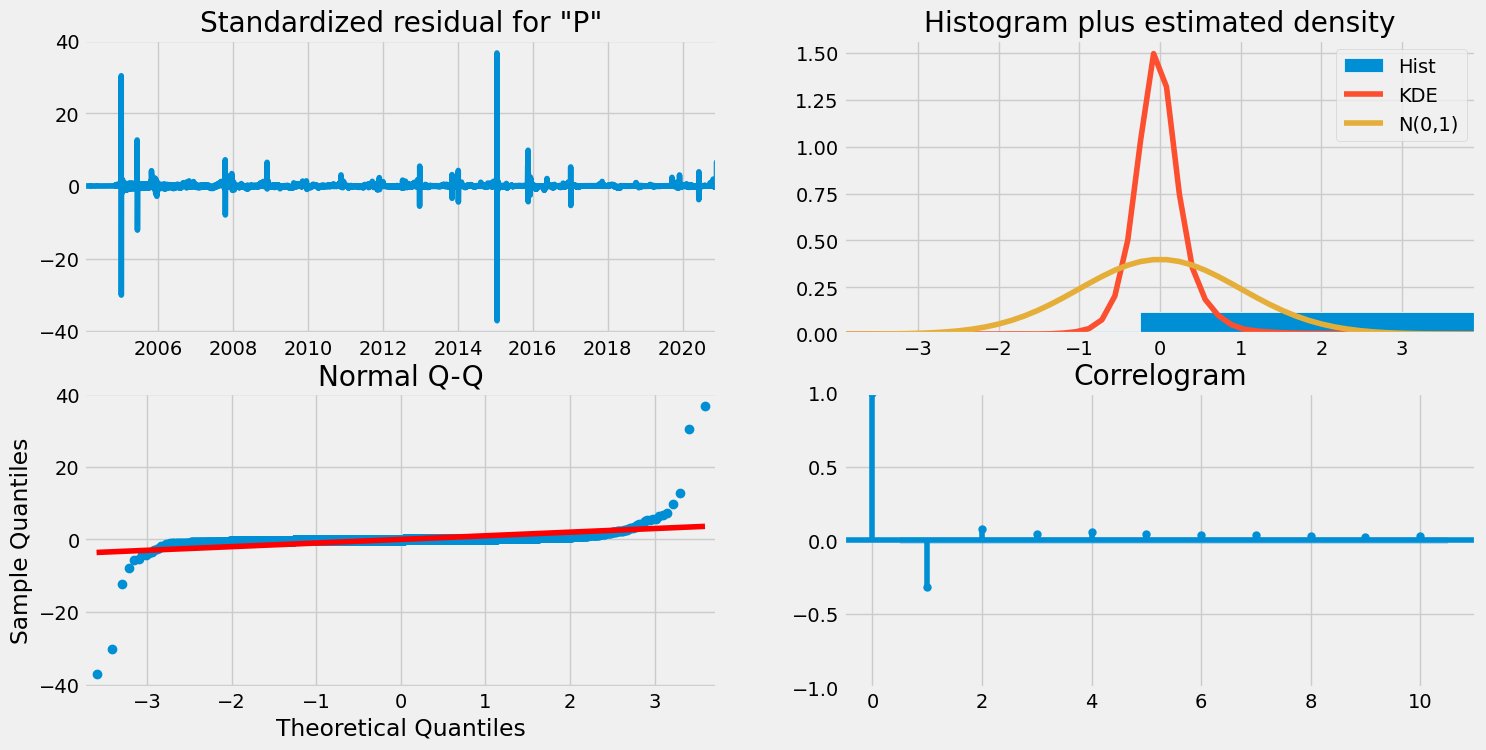

In [39]:
poondi_level_results.plot_diagnostics(figsize=(16,8))
plt.show()

In [42]:
poondi_rain_model = sm.tsa.statespace.SARIMAX(poondi_rain['POONDI'], order=(1,0,0),seasonal_order=(1,1,1,12), enforce_stationary=False, enforce_invertibility=False)
poondi_rain_results = poondi_rain_model.fit()
print(poondi_rain_results.summary().tables[1])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2187      0.005     45.783      0.000       0.209       0.228
ar.S.L12       0.0415      0.008      5.407      0.000       0.026       0.057
ma.S.L12      -1.0000      1.898     -0.527      0.598      -4.720       2.720
sigma2       160.0910    303.936      0.527      0.598    -435.612     755.794


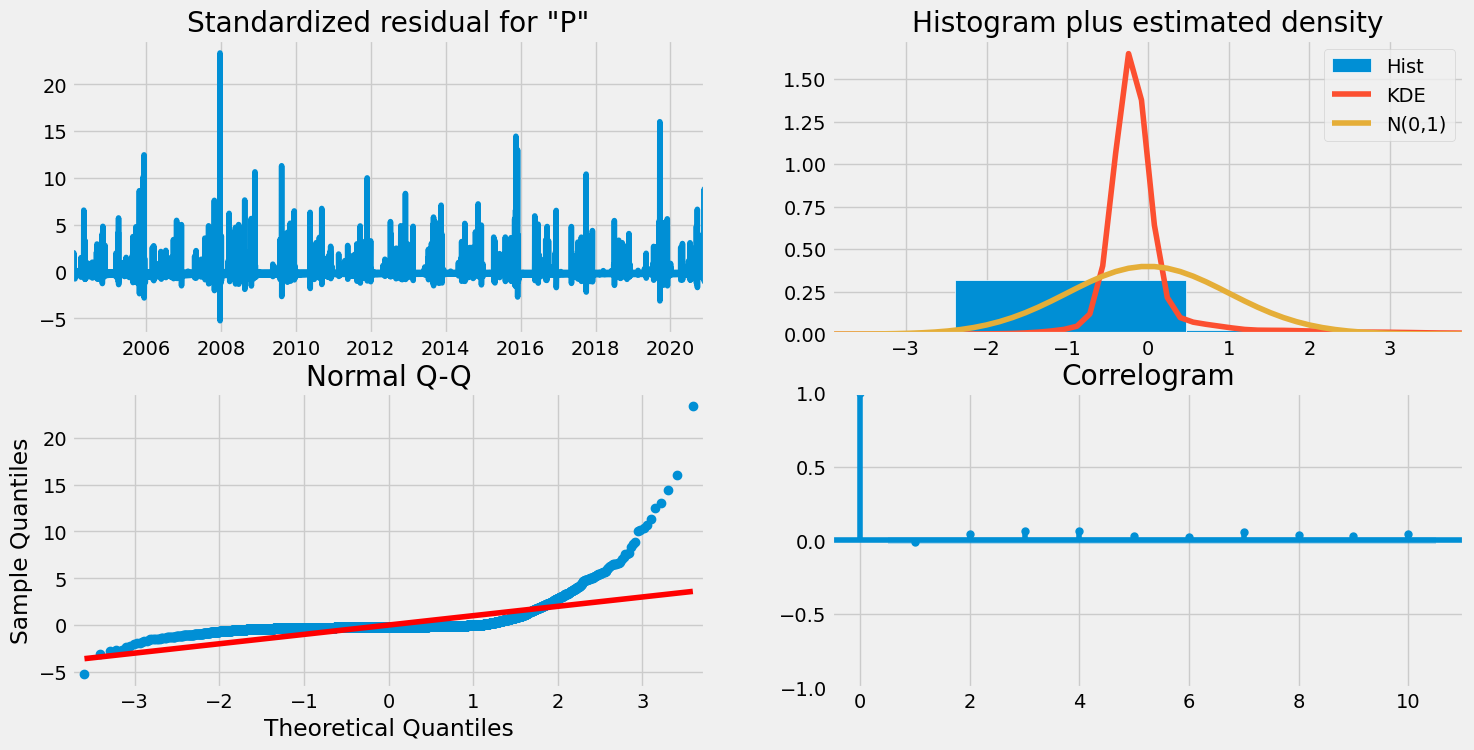

In [43]:
poondi_rain_results.plot_diagnostics(figsize=(16,8))
plt.show()


**Analysis**

1) We can observe that when ever the Water levels are low in the reservoirs, the usage goes -ve and then immediatly usage becomes +ve. This means during scarcity of water in reservoirs, the city responds by conserving and then immediatly overusing.

2) During the immediate overuse stage, the water levels in reservoirs also increase rapidly even though the rains may/ may not happen at large levels.( see rain trends vs usage trends). This means that during scarecity of water, the city has pumped in water from external resources (apart from rain) to the reservoirs.

3) The effect of rain on reservoir level is valid only till total mcft reached 10000. Beyond that the effect is negligible which means the capacity threshold of the 4 reservoirs together is around 10000 mcft.

4) Every year since 2011,the reservoir levels have reached new lows. In order to balance it, the usage should be increasingly -ve during those time. However, the usage has remained more or the same in these years, the exception being 2015 and 2017, where the lows were low and highs reach the threshold of 10,000 mcft.

5) Infact the usage and reservoir levels are correlated 5/7 times . i.e.( level proprtional to usage increase)

6) However post 2017, the levels have been half of 2017, city was unable to pump enough water and the water was over used.(see usage spike and total level) Also since 2015 Q4 , the rainfall levels kept decreasing( rain trend )

7) Due to this , the reservoir levels are reaching the lowest lows till date(~0mcft) but the usage continues to remain more or less the same.

8) Collating points 5) 6) and 7) , the city can be saved only if - a) The city is able to pump in additional water rapidly (which it is failing since 2015) b) There should be more rains incoming (which is decreasing since 2015)

**CONCLUSION**

The city started to ill manage water resources starting from 2011. However since 2017 after a surge in water level, the situation became worse because of less rains and same level of water consumption)

This means that the city should wait for rains or spend more in pumping external water resources to quench the thirst of Chennai